## 4a. Calculate fugacity coefficients

## Setting things up
You need to install VolFe once on your machine, if you haven't yet. Then we need to import a few Python packages (including VolFe). 

In [1]:
# Install VolFe on your machine. Don't remove the # from this line!
# pip install VolFe # Remove the first # in this line if you have not installed VolFe on your machine before.

# import python packages
import pandas as pd
import matplotlib.pyplot as plt
import VolFe as vf

This allows you to calculate the fugacity coefficient for all vapor species in the CHOSX system at a given *P* and *T*.

It can be run for multiple sets of conditions defined in the input data frame or loaded from a csv file.

This first example is for a single set of conditions defined in a dataframe.

In [2]:
# Define conditions T as a dictionary.
my_analysis = {'Sample':'test',
           'T_C': 1200., # Temperature in 'C
           'P_bar':1000.} # Pressure in bar

# Turn the dictionary into a pandas dataframe, setting the index to 0.
my_analysis = pd.DataFrame(my_analysis, index=[0])

We'll use the default options

In [3]:
# print default options in VolFe
print(vf.default_models)

                            option
type                              
COH_species     yes_H2_CO_CH4_melt
H2S_m                         True
species X                       Ar
Hspeciation                   none
fO2                       Kress91A
...                            ...
error                          0.1
print status                 False
output csv                    True
setup                        False
high precision               False

[78 rows x 1 columns]


And this runs the calculation

In [4]:
vf.calc_fugacity_coefficients(my_analysis)

,Sample,P_bar,T_C,yO2,yH2,yH2O,yS2,ySO2,yH2S,yCO2,...,y_H2S opt,y_H2 opt,y_O2 opt,y_S2 opt,y_CO opt,y_CH4 opt,y_H2O opt,y_OCS opt,y_X opt,Date
0,test,1000.0,1200.0,1.209858,1.126166,1.004254,1.191327,1.206456,1.489942,1.265765,...,Shi92_Hughes24,Shaw64,Shi92,Shi92,Shi92,Shi92,Holland91,Shi92,ideal,2024-08-07 13:20:36.489791


We'll show an example by loading from the csv file found in files.

In [5]:
# Read csv to define melt composition
my_analyses = pd.read_csv("../files/inputs_y.csv") 

And below runs the calculation

In [6]:
results = vf.calc_fugacity_coefficients(my_analyses)

And we can plot them - this is an example for CO2

Text(0, 0.5, 'y CO2')

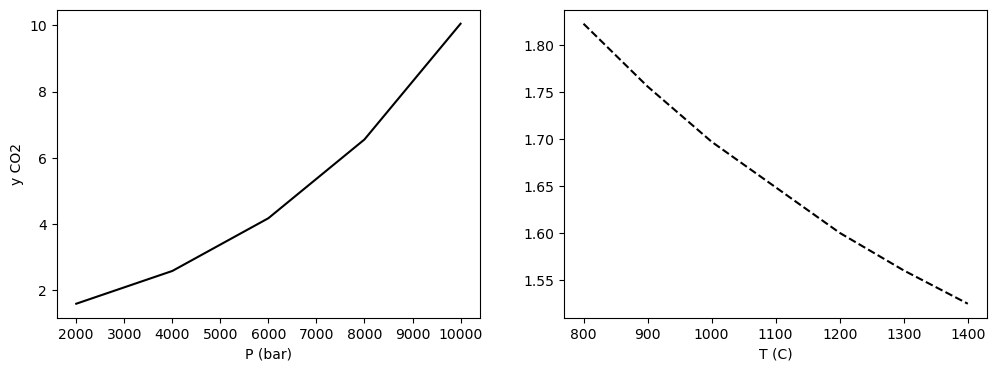

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

data1 = results[results['P_bar'] == 2000.] # 2000 bar
data2 = results[results['T_C'] == 1200.] # 1200 'C

# Plotting results
ax1.plot(data2['P_bar'], data2['yCO2'], '-k')
ax2.plot(data1['T_C'], data1['yCO2'], '--k')

ax1.set_xlabel('P (bar)')
ax2.set_xlabel('T (C)')
ax1.set_ylabel('y CO2')